<a href="https://colab.research.google.com/github/MagfirohIndahKarisma/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking

### Nama: Magfiroh Indah Karisma
### NIM: 2141720180
### Kelas: TI-3F

## TUGAS PRAKTIKUM



In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

1. Buat Gamma Correction sesuai dengan petunjuk berikut Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


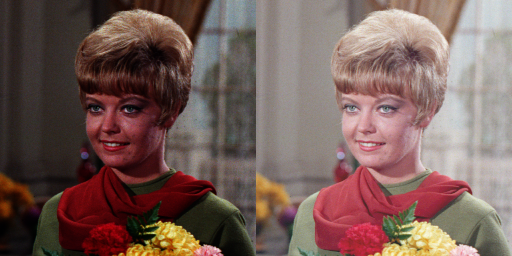

In [35]:
print(' Gamma Correction pada citra ')
print('-----------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/female.tiff')

gamma_corrected = np.power((original / 255), 1/gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

final_frame=cv2.hconcat ((original,gamma_corrected))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst. Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.



Simulasi Image Depth
--------------------
Masukkan nilai Bit Depth: 2


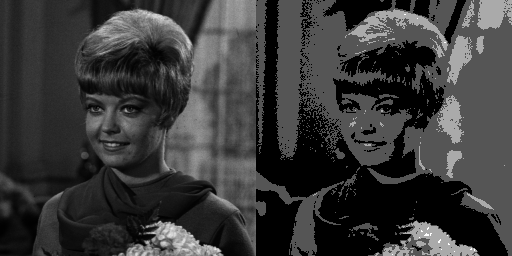

In [29]:
print('Simulasi Image Depth')
print('--------------------')
try:
 bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, not a number')

level = 255 / (pow(2,bit_depth)-1)
grayscale = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/female.tiff', cv2.IMREAD_GRAYSCALE)
# depth_image = np.zeros(grayscale.shape, grayscale.dtype)

# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#             depth_image[y,x]=np.clip(round(grayscale[y,x] / level) * level,0,255)

depth_image = np.round(grayscale/level) * level
depth_image = depth_image.astype(np.uint8)

final_frame=cv2.hconcat ((grayscale,depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).


 Simulasi Image Depth 
----------------------
Masukkan nilai Bit Depth: 10
28.994368777979254


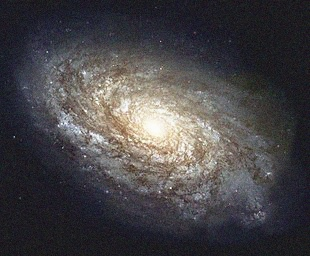

In [30]:
# Citra Average 10
print(' Simulasi Image Depth ')
print('----------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Study/PCVK/images/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Masukkan nilai Bit Depth: 20
28.949024205085877


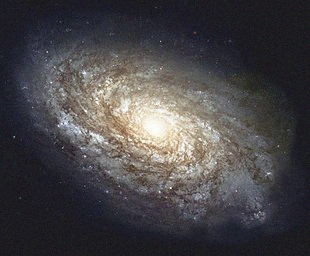

In [31]:
# Citra Average 20
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Study/PCVK/images/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Masukkan nilai Bit Depth: 40
28.917142462343698


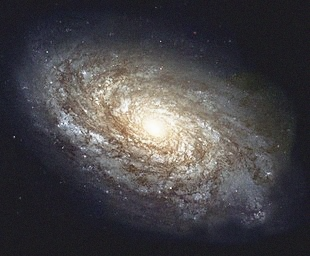

In [32]:
# Citra Average 40
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Study/PCVK/images/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Masukkan nilai Bit Depth: 80
28.921662433411548


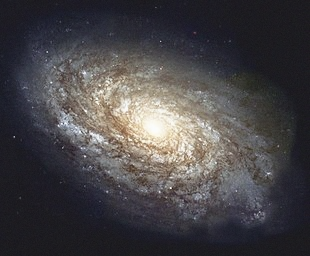

In [33]:
# Citra Average 80
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Study/PCVK/images/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Masukkan nilai Bit Depth: 100
28.914254105236992


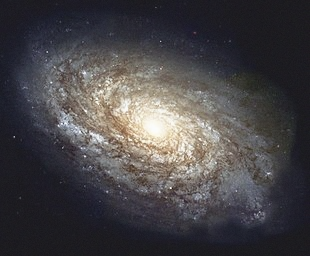

In [34]:
# Citra Average 100
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Study/PCVK/images/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)


4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:



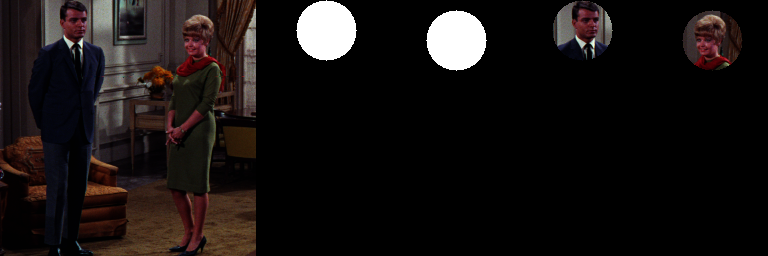

In [23]:
couple_img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv2.bitwise_and(couple_img, mask)

final_frame = cv2.hconcat((couple_img, mask, masked_image))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

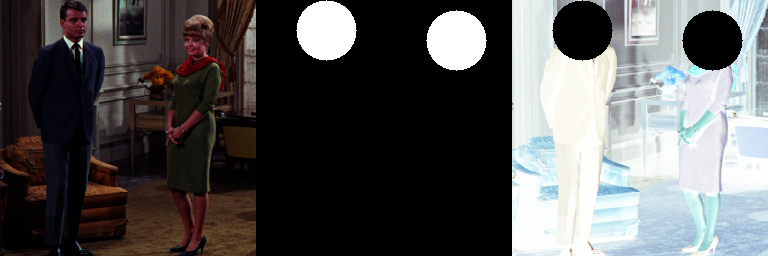

In [24]:
# NOT
couple_img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = ~couple_img & ~mask

final_frame = cv2.hconcat((couple_img, mask, masked_image))
cv2_imshow(final_frame)

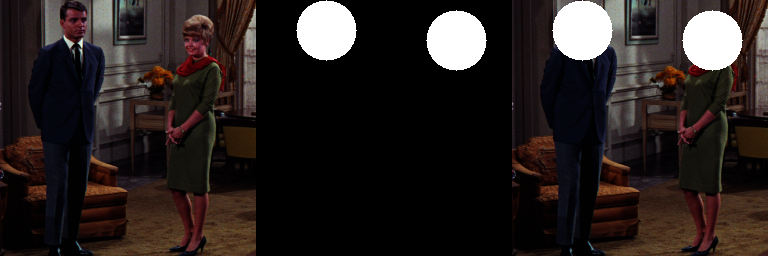

In [25]:
# OR
couple_img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv2.bitwise_or(couple_img, mask)

final_frame = cv2.hconcat((couple_img, mask, masked_image))
cv2_imshow(final_frame)

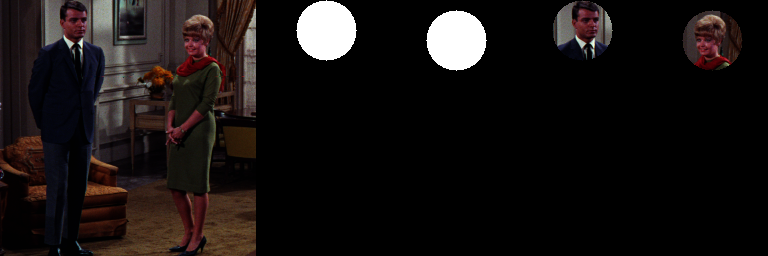

In [26]:
# AND
couple_img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv2.bitwise_and(couple_img, mask)

final_frame = cv2.hconcat((couple_img, mask, masked_image))
cv2_imshow(final_frame)

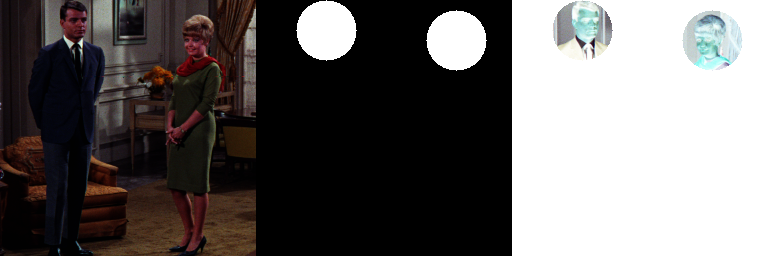

In [27]:
# NAND
couple_img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

nand_image = cv2.bitwise_not(cv2.bitwise_and(couple_img, mask))

final_frame = cv2.hconcat((couple_img, mask, nand_image))
cv2_imshow(final_frame)

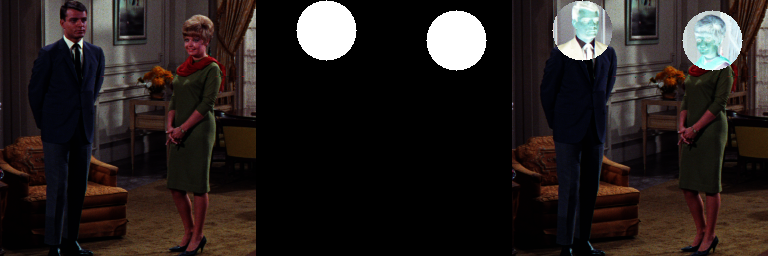

In [28]:
# XOR
couple_img = cv2.imread('/content/drive/MyDrive/Study/PCVK/images/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv2.bitwise_xor(couple_img, mask)

final_frame = cv2.hconcat((couple_img, mask, masked_image))
cv2_imshow(final_frame)